In [1]:
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.db as db
import lsst.sims.maf.utils as utils
import sqlite3
import numpy as np
from lsst.sims.maf.metrics.snSLMetric import SNSLMetric
import lsst.sims.maf.metrics as metrics
import healpy as hp
import os

import matplotlib.pylab as plt
%matplotlib inline
import datetime

In [2]:
path_where_version_folder_is_stored = "dbs"
version = 'v1.5' # "v1.5"

list_of_databases = os.listdir("%s"% (path_where_version_folder_is_stored))

list_of_databases.sort()


In [3]:

list_of_databases = [list_of_databases[5]]
list_of_databases

m5mins={'u': 22.7, 'g': 24.1, 'r': 23.7, 'i': 23.1, 'z': 22.2, 'y': 21.4}
for key in m5mins:
    m5mins[key] = 10.

0 of 1
2021-04-06 09:34:44.228416
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Querying database SummaryAllProps with no constraint for columns ['observationId', 'night', 'visitTime', 'visitExposureTime', 'filter', 'fieldDec', 'observationStartMJD', 'numExposures', 'fieldRA', 'fiveSigmaDepth'].
Found 2224095 visits
Running:  ['baseline_v1_5_10yrs_SNSLMetric_HEAL']


/Users/yoachim/git_repos/sims_maf/python/lsst/sims/maf/maps/dustMap.py:24: UserWarning: Slicer value of nside (64) different from map value (128), using slicer value
  warnings.warn('Slicer value of nside (%i) different from map value (%i), using slicer value'


Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "" constraint now.


/Users/yoachim/lsst/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.1/lib/python3.8/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(
/Users/yoachim/lsst/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.1/lib/python3.8/site-packages/healpy/pixelfunc.py:1581: UserWarning: monopole: 0.000369783  dipole: lon: -87.4523, lat: -84.6026, amp: 0.000135672
  warnings.warn(


Plotting complete.
baseline_v1.5_10yrs.db: 13.449883


/Users/yoachim/lsst/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.1/lib/python3.8/site-packages/healpy/projaxes.py:920: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_over(newcm(1.0))
/Users/yoachim/lsst/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.1/lib/python3.8/site-packages/healpy/projaxes.py:921: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_under(bgcolor)
/Users/yoachim/lsst/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.1/lib/python3.8/site-packages/healpy/projaxes.py:9

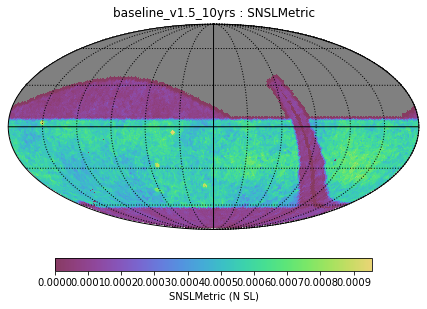

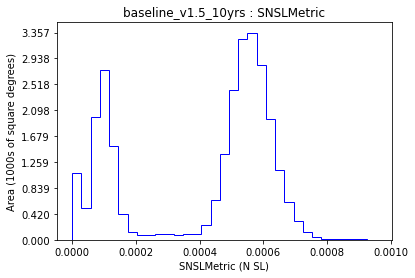

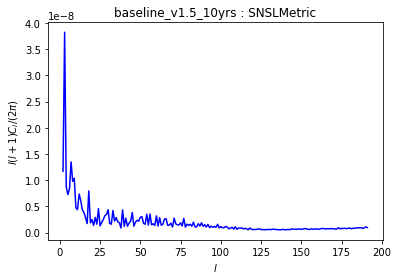

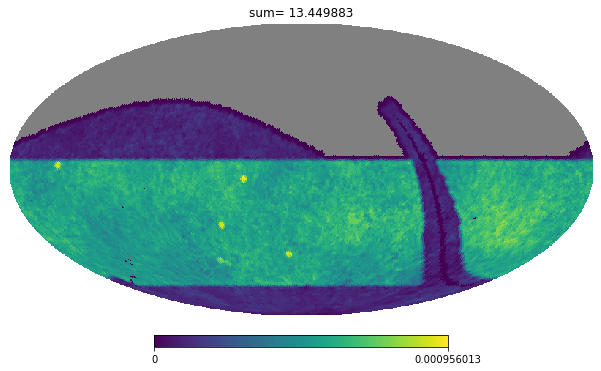

In [4]:
for j,i in enumerate(list_of_databases):
    print('%i of %i' % (j,len(list_of_databases)))
    print(datetime.datetime.now())

    #if i == "baseline_nexp1_v1.6_10yrs.db": 

    # Database available from https://lsst-web.ncsa.illinois.edu/sim-data/sims_featureScheduler_runs1.4/baseline/
    dbFile = os.path.join(path_where_version_folder_is_stored,'%s' % (i)) #'descddf_v1.4_10yrs.db'
    dbName = i.replace('.db', '')
    opsimdb = db.OpsimDatabase(dbFile)
    
    
    slicer = slicers.HealpixSlicer(nside=64, useCache=False)
    
            
    bundleList= []
    
    metric = SNSLMetric(night_collapse=True, m5mins=m5mins)
    summaryStats = [metrics.SumMetric()]            
    sql = '' 
    
    print(metric)
    
    bundleList.append(metricBundles.MetricBundle(
        metric, slicer, sql, runName= dbName,summaryMetrics=summaryStats))

    outDir='temp'
    resultsDb = db.ResultsDb(outDir=outDir)
    bundleDict = metricBundles.makeBundlesDictFromList(bundleList)
    bgroup = metricBundles.MetricBundleGroup(bundleDict, opsimdb, outDir=outDir, resultsDb=resultsDb)
    bgroup.runAll()
    
    bgroup.plotAll(closefigs=False)
    
    strategy_name = list(bundleDict)[0]
    
    nSL = bundleDict[strategy_name]
    nSL = nSL.metricValues[~nSL.metricValues.mask]
    nSL = nSL[nSL>0]    
    print("%s: %f" % (i,np.sum(nSL)))
    
    
    hp.mollview(bundleList[0].metricValues,  title='sum= %f' % bundleList[0].summaryValues['Sum'])